# Interpolación

In [1]:
import numpy as np
from scipy import interpolate
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook
sym.init_printing()
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["figure.figsize"] = (4, 3)
plt.style.use("seaborn-notebook")

## Interpolación de Lagrange en 1 dimensión

Como mencionamos en clase, el polinomio de Lagrange que pasa por $k + 1$ puntos

$$(x_0, y_0), (x_1, y_1), \cdots, (x_k, y_k)\, ,$$

está dado por la combinación lineal

$$L(x) \equiv \sum_{j=0}^k y_j l_j (x)$$

de polinomios base

$$ l_j(x) \equiv \prod_{m=0, m\neq j}^k \frac{x - x_m}{x_j - x_m}\, .$$

La siguiente función permite calcular cada función base.

In [3]:
def base_lagrange(x_datos, var, cont):
    """Crea un polinomio base de Lagrange para los datos x"""
    prod = sym.prod((var - x_datos[i])/(x_datos[cont] - x_datos[i])
                    for i in range(len(x_datos)) if i != cont)
    return sym.simplify(prod)

Si tomamos los siguientes datos

In [4]:
x, x0, h1, h2, u1, u2, u3 = sym.symbols("x x0 h1 h2 u1 u2 u3")
x_datos = [0, 1, 3, 4]
y_datos = [xx**5 + 5 for xx in x_datos]

In [5]:
y_datos

In [6]:
bases = []
for cont in range(len(x_datos)):
    bases.append(base_lagrange(x_datos, x, cont))

poli = sum(bases[cont]*y_datos[cont] for cont in range(len(x_datos)))

In [7]:
sym.simplify(poli)

In [8]:
x = sym.symbols("x")
x_datos = range(1985, 2016, 5)
y_datos = [30802, 34130, 37472, 40296, 42889, 45510, 48203]

In [22]:
%load_ext nb_black

<IPython.core.display.Javascript object>

Obtenemos las siguientes funciones base

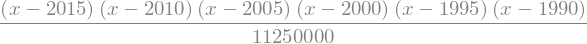

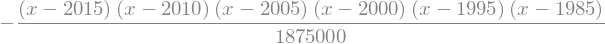

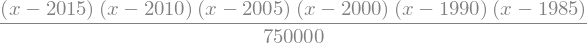

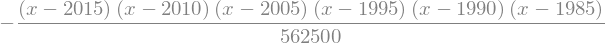

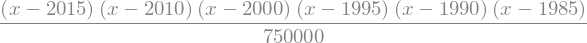

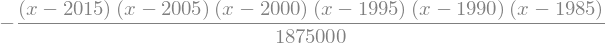

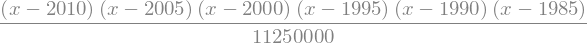

In [9]:
bases = []
for cont in range(len(x_datos)):
    bases.append(base_lagrange(x_datos, x, cont))
    display(bases[cont])

poli = sum(bases[cont]*y_datos[cont] for cont in range(len(x_datos)))

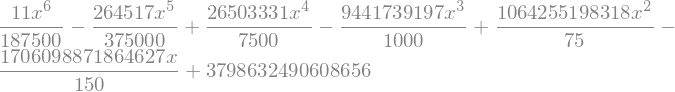

In [10]:
sym.simplify(poli)

<IPython.core.display.Javascript object>


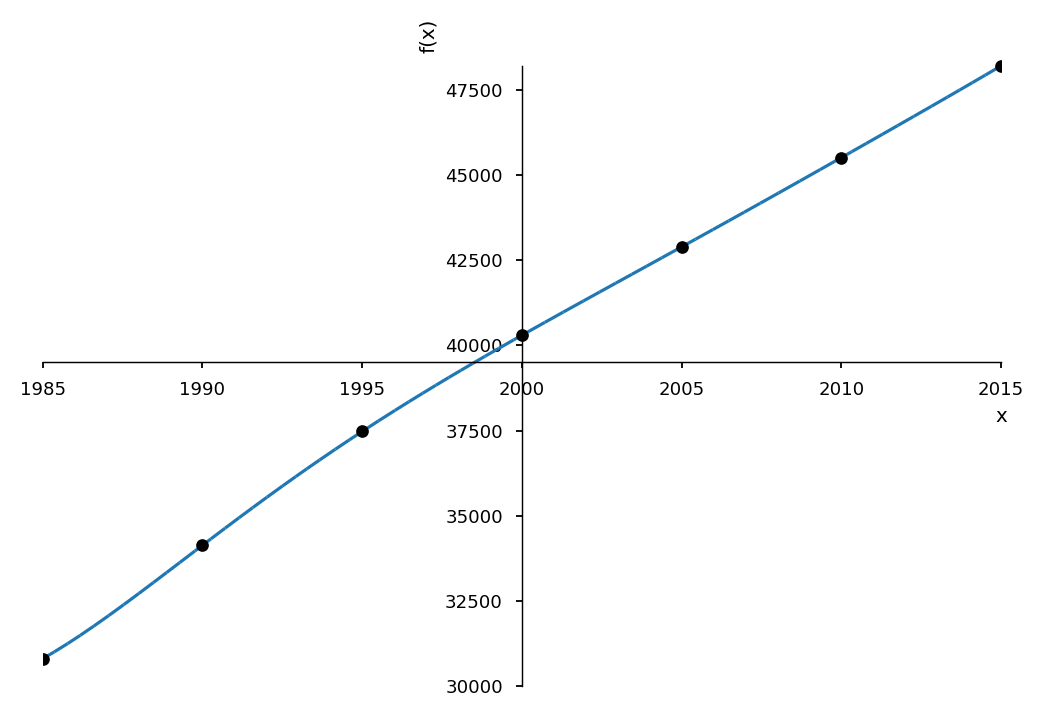

In [11]:
sym.plot(poli, (x, 1985, 2015))
plt.gca().plot(x_datos, y_datos, "ok");

### Usando SciPy para interpolaciones

SciPy contiene el paquete de interpolaciones ``scipy.interpolate``. La función ``interp1d``
nos permite hacer interpolaciones a trozos de una serie de datos. Por medio del parámetro
``kind`` podemos indicar el orden de la interpolación.

In [12]:
x = np.arange(0, 10)
y = np.exp(-x/3.0)
x_interp = np.arange(0, 9, 0.1)
kinds = ["zero", "nearest", "slinear", "linear", "quadratic", "cubic"]

<IPython.core.display.Javascript object>


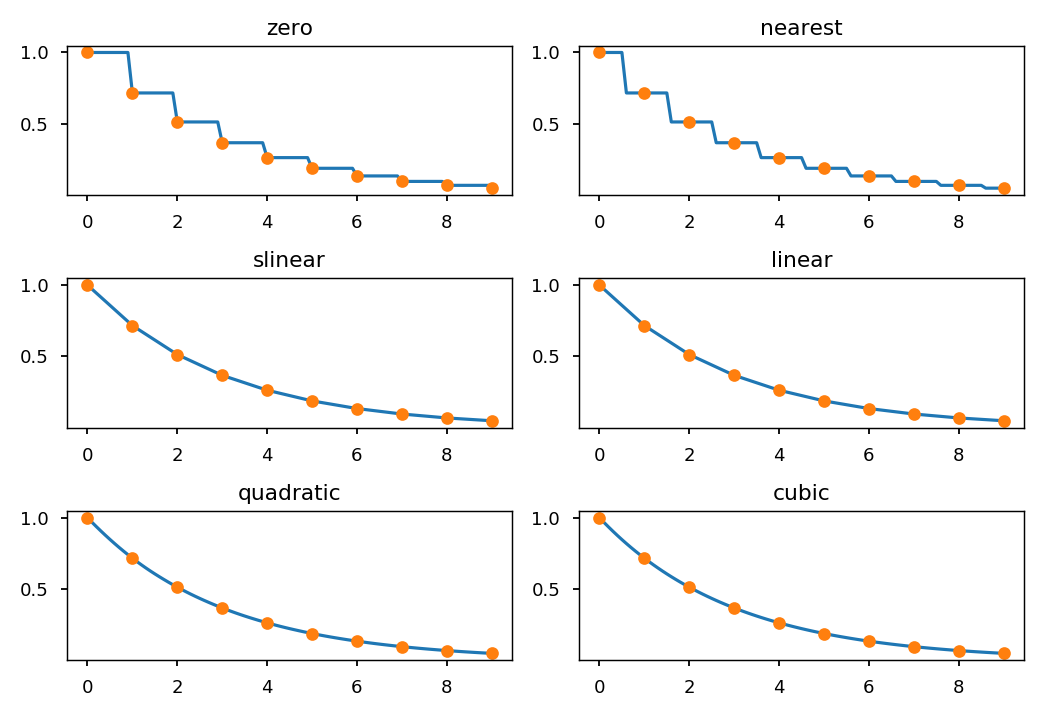

In [13]:
plt.figure()
for cont, kind in enumerate(kinds):
    f = interpolate.interp1d(x, y, kind=kind)
    y_interp = f(x_interp)
    plt.subplot(3, 2, cont + 1)
    plt.plot(x_interp, y_interp)
    plt.plot(x, y, "o")
    plt.title(kind)


plt.tight_layout();

Si queremos obtener un polinomio que interpole todos los datos podemos usar la función
``lagrange``.

<IPython.core.display.Javascript object>


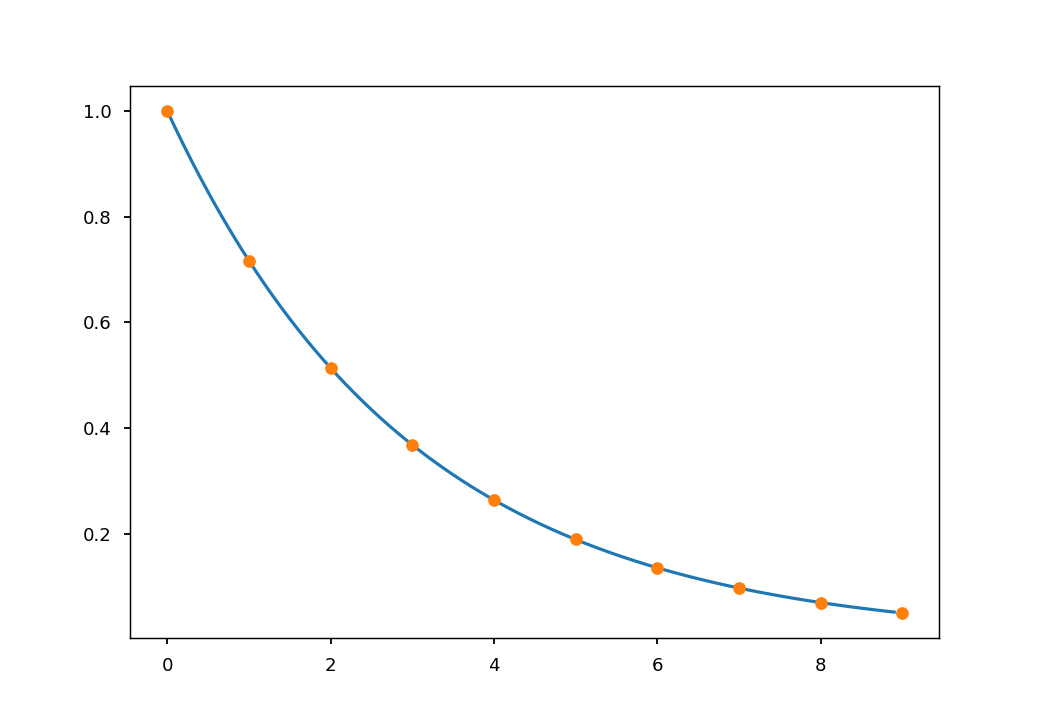

In [14]:
f = interpolate.lagrange(x, y)
y_interp = f(x_interp)
plt.figure()
plt.plot(x_interp, y_interp)
plt.plot(x, y, "o");

El uso de polinomios de orden alto puede causar oscilaciones no deseadas en la interpolación,
esto se conoce con el nombre de "Fenómeno de Runge".

<IPython.core.display.Javascript object>


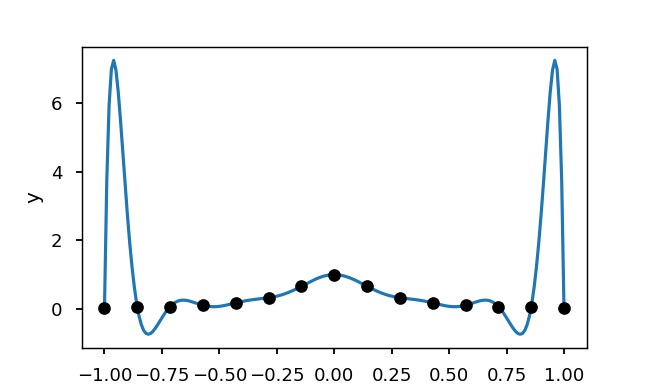

In [15]:
x = np.linspace(-1, 1, 15)
y = 1/(1 + 25*x**2)
f = interpolate.lagrange(x, y)
x_interp = np.linspace(-1, 1, 201)
y_interp = f(x_interp)
plt.figure(figsize=(5, 3))
plt.plot(x_interp, y_interp)
plt.plot(x, y, "ko")
plt.xlabel("x")
plt.ylabel("y");

Para solucionar este problema se puede recurrir a hacer una interpolación a tramos, como se
hizo anteriormente, o hacer un muestreo no uniforme.

Veamos un ejemplo de lo segundo.

<IPython.core.display.Javascript object>


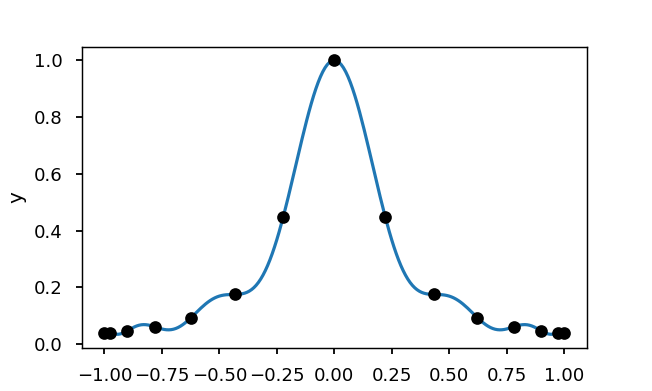

In [16]:
x = -np.cos(np.linspace(0, np.pi, 15))
y = 1/(1 + 25*x**2)
f = interpolate.lagrange(x, y)
x_interp = np.linspace(-1, 1, 201)
y_interp = f(x_interp)
plt.figure(figsize=(5, 3))
plt.plot(x_interp, y_interp)
plt.plot(x, y, "ko")
plt.xlabel("x")
plt.ylabel("y");

## Interpolación en 2 dimensiones

Podemos extener el concepto de interpolación de Lagrange a más dimensiones. En el
caso de interpolación bilineal (2×2, 4 vértices) en $[-1, 1]^2$, las funciones
base están dadas por

\begin{align}
N_0 = \frac{1}{4}(1 - x)(1 - y)\\
N_1 = \frac{1}{4}(1 + x)(1 - y)\\
N_2 = \frac{1}{4}(1 + x)(1 + y)\\
N_3 = \frac{1}{4}(1 - x)(1 + y)
\end{align}

Veamos un ejemplo en el que hacemos una interpolación bilineal a trozos.

In [17]:
def rect_grid(Lx, Ly, nx, ny):
    u"""Genera una malla estructurada para un rectángulo
    
    El rectángulo tiene dimensiones Lx por Ly, y nx son los
    nodos en x, y ny son los nodos en y.
    """
    y, x = np.mgrid[-Ly/2:Ly/2:ny*1j, -Lx/2:Lx/2:nx*1j]
    els = np.zeros(((nx - 1)*(ny - 1), 4), dtype=int)
    for row in range(ny - 1):
        for col in range(nx - 1):
            cont = row*(nx - 1) + col
            els[cont, :] = [cont + row, cont + row + 1,
                              cont + row + nx + 1, cont + row + nx]
    return x.flatten(), y.flatten(), els

In [18]:
def interp_bilineal(coords, f_vals, grid=(10, 10)):
    """Interpolación bilineal a trozos para dominios rectangulares"""
    x_min, y_min = np.min(coords, axis=0)
    x_max, y_max = np.max(coords, axis=0)
    x, y = np.mgrid[-1:1:grid[0]*1j,-1:1:grid[1]*1j]
    N0 = (1 - x) * (1 - y)
    N1 = (1 + x) * (1 - y)
    N2 = (1 + x) * (1 + y)
    N3 = (1 - x) * (1 + y)
    interp_fun = N0 * f_vals[0] + N1 * f_vals[1] + N2 * f_vals[2] + N3 * f_vals[3]
    interp_fun = 0.25*interp_fun
    x, y = np.mgrid[x_min:x_max:grid[0]*1j, y_min:y_max:grid[1]*1j]
    return x, y, interp_fun

Cambie la función y la rejilla para la interpolación y vea lo que pasa en
la siguiente celda.

In [19]:
fun = lambda x, y: y**3 +  3*y*x**2 # Silla del mono, intente otra función
x_coords, y_coords, els = rect_grid(2, 2, 4, 4)
nels = els.shape[0]
z_coords = fun(x_coords, y_coords)
z_min = np.min(z_coords)
z_max = np.max(z_coords)

<IPython.core.display.Javascript object>


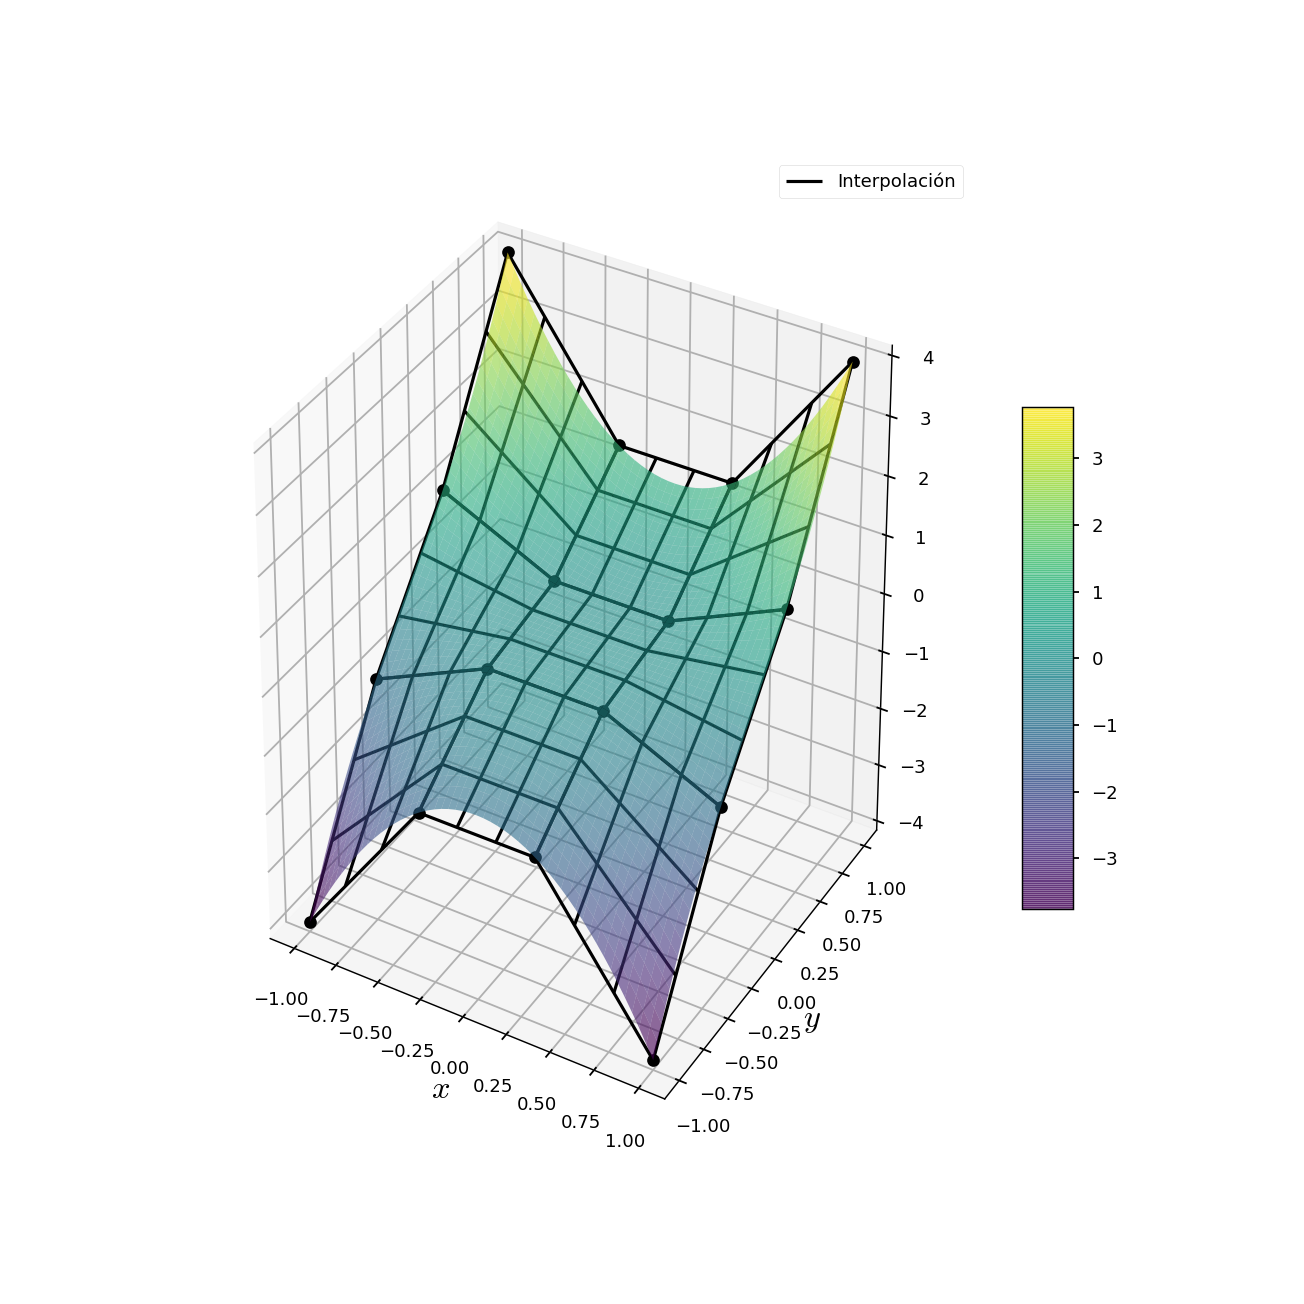

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x, y = np.mgrid[-1:1:51j,-1:1:51j]
z = fun(x, y)
surf =ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, alpha=0.6,
                      cmap="viridis")
plt.colorbar(surf, shrink=0.5, aspect=10)
ax.plot(x_coords, y_coords, z_coords, 'ok')
for k in range(nels):
    x_vals = x_coords[els[k, :]]
    y_vals = y_coords[els[k, :]]
    coords = np.column_stack([x_vals, y_vals])
    f_vals = fun(x_vals, y_vals)
    x, y, z = interp_bilineal(coords, f_vals, grid=[4, 4])
    inter = ax.plot_wireframe(x, y, z, color="black")
plt.xlabel(r"$x$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18)
ax.legend([inter], [u"Interpolación"])
plt.show()                 

ValueError: 'nb_black' was not found in history, as a file, url, nor in the user namespace.